In [50]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Input, Normalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
import numpy as np



In [2]:
df_train = pd.read_csv('train.txt')
df_val = pd.read_csv('val.txt')
df_test = pd.read_csv('test.txt')

In [3]:
df_train

,Var1_1,Var1_2
0,0.001374191+0.0007656791i,0.001241228+0.0008236876i
1,0.002563628+0.0009175068i,0.002474111+0.001257619i
2,0.003343391+0.001457953i,0.003212301+0.001847259i
3,0.003577207+0.0020518i,0.003443445+0.002519653i
4,0.003223582+0.00233736i,0.002986031+0.002810816i
...,...,...
131515,-0.003944376+0.003175103i,-0.004349313+0.002706349i
131516,-0.003387596+0.002728857i,-0.003774833+0.002274562i
131517,-0.002925173+0.001754717i,-0.003207921+0.001297825i
131518,-0.002830184+0.0003680737i,-0.002935457-0.0001179909i


In [15]:
# train
df_train['X_real'] = df_train['Var1_1'].str.extract(r'([+-]?\d+\.\d+(?:[eE][+-]?\d+)?)').astype(float)
df_train['X_img'] = df_train['Var1_1'].str.extract(r'([+-]?\d+\.\d+(?:[eE][+-]?\d+)?)i').astype(float)
df_train['y_real'] = df_train['Var1_2'].str.extract(r'([+-]?\d+\.\d+(?:[eE][+-]?\d+)?)').astype(float)
df_train['y_img'] = df_train['Var1_2'].str.extract(r'([+-]?\d+\.\d+(?:[eE][+-]?\d+)?)i').astype(float)

# test
df_test['X_real'] = df_test['Var1_1'].str.extract(r'([+-]?\d+\.\d+(?:[eE][+-]?\d+)?)').astype(float)
df_test['X_img'] = df_test['Var1_1'].str.extract(r'([+-]?\d+\.\d+(?:[eE][+-]?\d+)?)i').astype(float)
df_test['y_real'] = df_test['Var1_2'].str.extract(r'([+-]?\d+\.\d+(?:[eE][+-]?\d+)?)').astype(float)
df_test['y_img'] = df_test['Var1_2'].str.extract(r'([+-]?\d+\.\d+(?:[eE][+-]?\d+)?)i').astype(float)

# val
df_val['X_real'] = df_val['Var1_1'].str.extract(r'([+-]?\d+\.\d+(?:[eE][+-]?\d+)?)').astype(float)
df_val['X_img'] = df_val['Var1_1'].str.extract(r'([+-]?\d+\.\d+(?:[eE][+-]?\d+)?)i').astype(float)
df_val['y_real'] = df_val['Var1_2'].str.extract(r'([+-]?\d+\.\d+(?:[eE][+-]?\d+)?)').astype(float)
df_val['y_img'] = df_val['Var1_2'].str.extract(r'([+-]?\d+\.\d+(?:[eE][+-]?\d+)?)i').astype(float)

In [16]:
X_train = df_train[['X_real','X_img']]
y_train = df_train[['y_real','y_img']]

X_test = df_test[['X_real','X_img']]
y_test = df_test[['y_real','y_img']]

X_val = df_val[['X_real','X_img']]
y_val = df_val[['y_real','y_img']]

In [54]:
from sklearn import preprocessing

x_min_max_scaler = preprocessing.MinMaxScaler()
y_min_max_scaler = preprocessing.MinMaxScaler()

X_train = x_min_max_scaler.fit_transform(X_train)
y_train = y_min_max_scaler.fit_transform(y_train)



In [56]:
X_val = x_min_max_scaler.transform(X_val)
y_val = y_min_max_scaler.transform(y_val)

X_test = x_min_max_scaler.transform(X_val)
y_test = y_min_max_scaler.transform(y_val)

c:\Users\abood\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\abood\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# # Build the model using Sequential API
# model = Sequential([
#     Dense(30),
#     LeakyReLU(alpha=0.01),
#     Dense(30),
#     LeakyReLU(alpha=0.01),
#     Dense(30),
#     LeakyReLU(alpha=0.01),
#     Dense(2)
# ])

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=4e-4), 
#               loss='mean_squared_error', 
#               metrics=['mean_squared_error'])

# # Define training parameters
# maxEpochs = 200
# miniBatchSize = 1024
# iterPerEpoch = len(X_train) // miniBatchSize
# validation_freq = 2 * iterPerEpoch

# # Callbacks for learning rate adjustment, early stopping, and model checkpoint
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.95, patience=5, verbose=1, mode='auto')
# # early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# # Train the model
# history = model.fit(
#     X_train, y_train,
#     epochs=maxEpochs,
#     batch_size=miniBatchSize,
#     validation_data=(X_val, y_val),
#     callbacks=[reduce_lr],
#     shuffle=True,
#     verbose=1
# )

In [61]:
X_train.shape

(131520, 2)

In [62]:
# defining layers
input_layer = Input(shape=(X_train.shape[1],))
dense_layer_1 = Dense(units = 30, activation = LeakyReLU(alpha=0.01))(input_layer) 
dense_layer_2 = Dense(units = 30, activation = LeakyReLU(alpha=0.01))(dense_layer_1)
dense_layer_3 = Dense(units = 30, activation = LeakyReLU(alpha=0.01))(dense_layer_2)

#Y1 output
y1_output = Dense(units = 1, activation = "linear", name = "y1_output")(dense_layer_2)

#Y2 output
y2_output = Dense(units = 1, activation = "linear", name = "y2_output")(dense_layer_3)

#Define the model with the input layer and a list of outputs
model = Model(inputs = input_layer, outputs = [y1_output, y2_output])

#specify the optimizer and compile with the loss function for both outputs
optimizer = tf.keras.optimizers.Adam(learning_rate=4e-4)

model.compile(optimizer = optimizer,
              loss = {'y1_output':'mse', 'y2_output':'mse'},
              metrics = {
                  'y1_output':tf.keras.metrics.MeanSquaredError(),
                  'y2_output':tf.keras.metrics.MeanSquaredError(),
              }
             )


c:\Users\abood\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [63]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))



Num GPUs Available:  0


In [64]:
# Define training parameters
maxEpochs = 200
miniBatchSize = 1024
iterPerEpoch = len(X_train) // miniBatchSize
validation_freq = 2 * iterPerEpoch


# history = model.fit(X_train, (y_train.y_real, y_train.y_img), epochs = 200, batch_size = 10,
#                     validation_data = (X_val, (y_val.y_real, y_val.y_img)))

# Train the model
history = model.fit(
    X_train, (y_train[:,0], y_train[:,1]),
    epochs=maxEpochs,
    batch_size=miniBatchSize,
    validation_data = (X_val, (y_val[:,0], y_val[:,1])),
    shuffle=True,
)

Epoch 1/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3027 - y1_output_mean_squared_error: 0.0833 - y2_output_mean_squared_error: 0.2193 - val_loss: 0.0142 - val_y1_output_mean_squared_error: 0.0043 - val_y2_output_mean_squared_error: 0.0100
Epoch 2/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0120 - y1_output_mean_squared_error: 0.0035 - y2_output_mean_squared_error: 0.0085 - val_loss: 0.0060 - val_y1_output_mean_squared_error: 0.0018 - val_y2_output_mean_squared_error: 0.0042
Epoch 3/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 - y1_output_mean_squared_error: 0.0014 - y2_output_mean_squared_error: 0.0032 - val_loss: 0.0023 - val_y1_output_mean_squared_error: 6.9922e-04 - val_y2_output_mean_squared_error: 0.0016
Epoch 4/200
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - y1_output_mean_squared_error: 6.6715e-04 - y2_output_mean_squared_error: 0.0015 - val_loss: 0.0012 - val_y1_output_mean_squared_error: 3.7109e-04 - val_y2_output_mean_square

<Axes: >

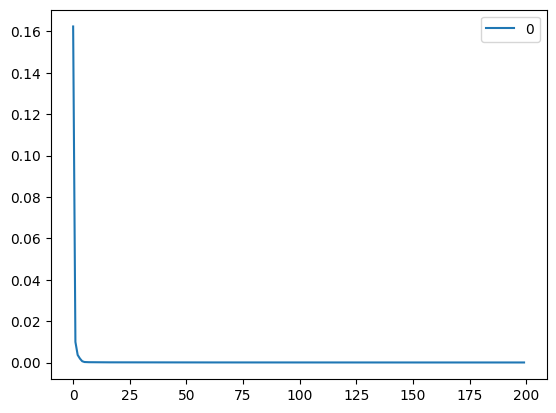

In [65]:
(pd.DataFrame(history.history['loss'])).plot()

In [66]:
model.evaluate(X_test,(y_test[:,0],y_test[:,1]))

4110/4110 ━━━━━━━━━━━━━━━━━━━━ 2s 516us/step - loss: 2.2431 - y1_output_mean_squared_error: 0.3963 - y2_output_mean_squared_error: 1.8468


[2.249091386795044, 0.4033825397491455, 1.845714807510376]